# Debias


In [15]:
%matplotlib inline
import os,sys
import numpy as np
import pandas as pd
import matplotlib
from   matplotlib import rc
import matplotlib.pyplot as plt
from   IPython.display import clear_output
rc('text', usetex=True)
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

sys.path.insert(1, '/home/marins/Documents/Programmation/BINGO/Component Separation/gmca4im/scripts')
import Extension4BINGO as cs

In [20]:
#####################################
#paths
#####################################
pathcls       = "/home/marins/Documents/Programmation/BINGO/Component Separation/gmca4im/test_new_module" #Path to the cls outputs from NoiseDebiasing2GMCA_building code results
dirs          = np.array(["ICAn3_starletJ1" , "ICAn3_identity","GMCAn3_s1_id"])#"GMCAn3_stJ1axB100"])
names         = np.array(["ICAn3 s1","ICAn3 identity","GMCAn3 s1 id"])#"GMCAn3 s1 ax100"])
colorplot     = np.array(["black","darkorange","dodgerblue","red","aqua","limegreen","fuchsia"])
dir_hi        = "21cm"        #Directory name of the cls of the 21cm reconstruction maps
dir_fg        = "foregrounds" #Directory name of the cls of the foregrounds reconstruction maps
dir_prior     = "prior"       #Directory name of the cls of the prior maps, that can be (21cm + noise) masked
dir_noise     = "noise"       #Directory name of the cls of the noise maps, that can be (WhiteNoise or/and 1/f) masked
dir_pure      = "pure"        #Directory name of the cls of the (only) 21cm maps, masked or not.
dir_projnoise = "projnoise"   #Directory name of the cls of the noise maps, that can be (WhiteNoise or/and 1/f) masked
dir_projpure  = "projpure"    #Directory name of the cls of the (only) 21cm maps, masked or not.
dir_projprior = "projprior"   #
debias_model  = "filipe"
#All of cls should be obtained from the same L's (seeds) 
####################################
# seed number 
####################################
seed_used  = 10        #L0 used for analysis, ie, the realisation used for analysis

############################################################################################################
# Plot parameters
############################################################################################################
numplots = 3
l0       = 0
del_l    = 4
fsky     = 0.8

In [21]:
params_plot = pd.Series({"numplots":numplots, "del_l":del_l,"fsky":fsky, "L0":"L{}".format(seed_used), "l0":l0})

In [22]:
paths = np.array([os.path.join(pathcls,idir) for idir in dirs])
for i,ipath in enumerate(paths):
    cls = cs.loadcls(ipath,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
    cls = cs.noisedebiasing(Cls_=cls, seed_used=seed_used, dir_hi = dir_hi, dir_prior=dir_prior, dir_noise = dir_noise, type_=debias_model)["Cls_debias"]
    l   = np.arange(len(cls))
    if i==0:
        Cls={names[i]:{"cl":cls,"l":l}}
    else:
        Cls[names[i]]={"cl":cls,"l":l}
Cls = pd.DataFrame(Cls)

In [23]:
cls = cs.loadcls(paths[0],dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])["pure"]

'   '

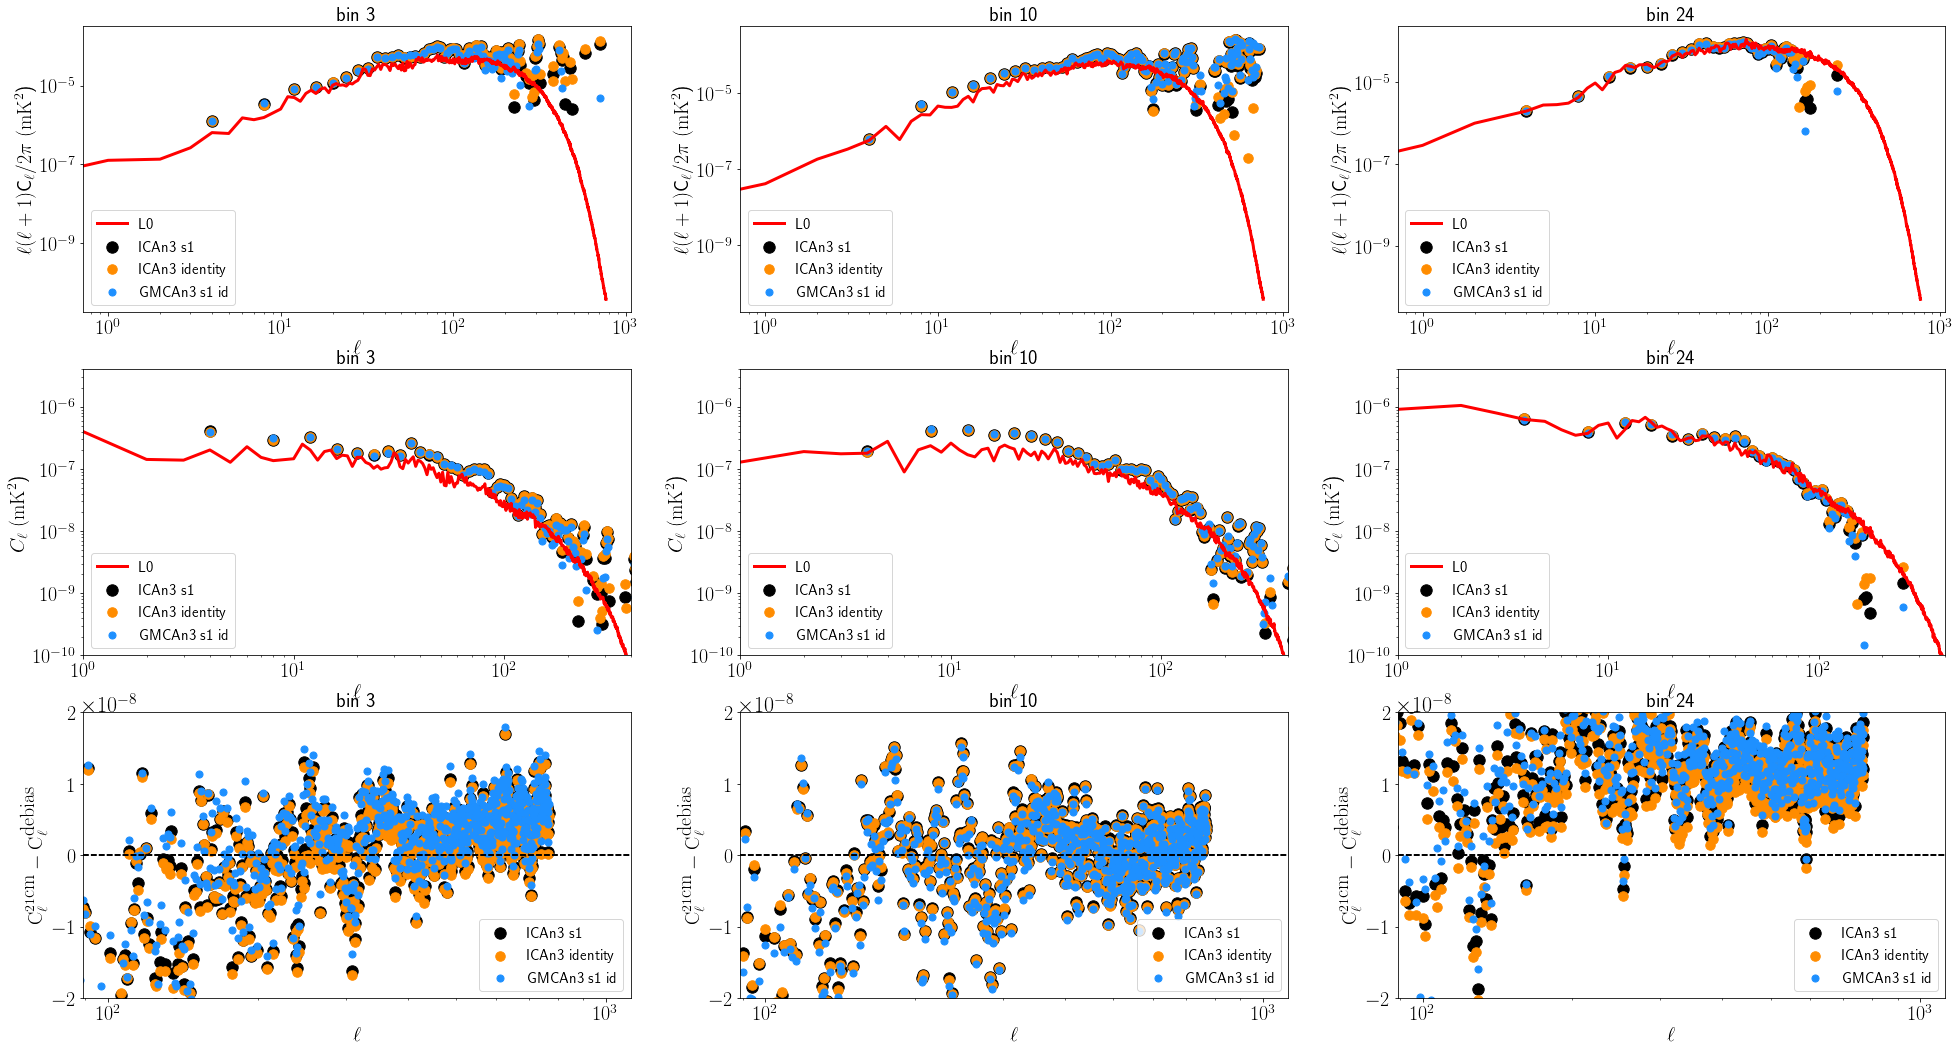

In [24]:
fig      = plt.figure()
numplots = 3
grid     = plt.GridSpec(3,2*numplots,top=3.5,right=3*numplots)
L0    = "L{}".format(seed_used)
nu,nl = cls[L0].shape
l     = np.arange(nl)
fact  = l*(l+1)/(2*np.pi)
del_l = 4
fsky  = 0.8
l0 = 0
bins = np.array([3,10,24]) #np.random.randint(nu,size=numplots
for col,i in enumerate(bins):
    params_plot["nch"]=i
    ax = plt.subplot(grid[0,col])
    plt.title("bin {}".format(i), fontsize=20)
    plt.plot(    l,fact*cls[L0][i], color="red", label="L0" , linewidth =3)
    for j,iname in enumerate(names):
        lb, clb = cs.clsbinned(Cls[iname]["cl"][i],del_l=del_l,l0=l0)
        factb =  lb*(lb+1)/(2*np.pi)
        #err   =cs.errorCls(clb,params_plot, type_=["21cm","noise"])
        #plt.errorbar(lb, factb*clb, yerr=factb*err, fmt=".",ls=None,  capsize=0,elinewidth=3,label=None, color=colorplot[j])
        plt.scatter( lb, factb*clb,s=int((len(names)*40+10)-40*j), label=iname, color=colorplot[j])
        plt.xscale("log")
        plt.yscale("log")
        ax.tick_params(axis='both', which='major', labelsize = 20)
        plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
        plt.xlabel(r"$\ell$", fontsize=20)
        plt.legend(fontsize=15)

    ax = plt.subplot(grid[1,col])
    plt.title("bin {}".format(i), fontsize=20)
    plt.plot(    l,cls[L0][i], color="red", label="L0" , linewidth = 3)
    for j,iname in enumerate(names):
        lb, clb = cs.clsbinned(Cls[iname]["cl"][i],del_l=del_l,l0=0)
        factb =  lb*(lb+1)/(2*np.pi)
        #plt.errorbar(lb, clb, yerr=cs.errora_cl(clb,lb, del_l, fsky, clb), fmt=".",ls=None, capsize=0,elinewidth=3,label=None, color=colorplot[j])
        plt.scatter( lb, clb, s=int((len(names)*40+10)-40*j), label=iname, color=colorplot[j])
        plt.xscale("log")
        plt.yscale("log")
        ax.tick_params(axis='both', which='major', labelsize = 20)
        plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
        plt.xlabel(r"$\ell$", fontsize=20)
        plt.legend(fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize = 20)
        plt.ylabel(r"$C_{\ell}$ $(\textrm{mK}^2$)", fontsize=20)
        plt.xlim(1,4e2)
        plt.ylim(1e-10,4e-6)
        plt.legend(fontsize=15)

    ax = plt.subplot(grid[2,col])
    plt.title("bin {}".format(i), fontsize=20)
    for j,iname in enumerate(names):
        plt.scatter( l, cls[L0][i]-Cls[iname]["cl"][i], s=int((len(names)*40+10)-40*j), label=iname, color=colorplot[j])
        plt.axhline(y=0, linestyle="dashed", color="black")
        plt.xscale("log")
        #plt.yscale("log")
        ax.tick_params(axis='both', which='major', labelsize = 20)
        plt.xlabel(r"$\ell$", fontsize=20)
        plt.ylabel(r"$\textrm{C}^{21\textrm{cm}}_{\ell} - \textrm{C}^{\textrm{debias}}_{\ell}$", fontsize=20)
        plt.ylim(-2e-8,2e-8)
        plt.legend(fontsize=15)
;    